## 2. Multivariate Linear Regression
In this notebook, we'll adjust our Linear Regression algorithm in order to fit a plane to two features in the Iris dataset. This implementation will be extensible to any number of features.

In [1]:
import pandas as pd
iris_df = pd.read_csv('../data/iris_csv.csv')
iris_df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Again, we'll ignore the class, but let's look at both petallength vs. petalwidth and sepallength vs. petalwidth

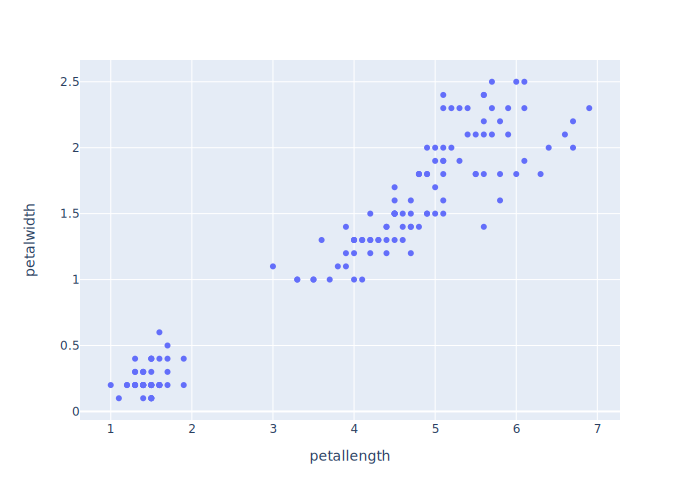

In [2]:
import plotly.express as px
plot = px.scatter(iris_df, x='petallength', y='petalwidth')
plot.show("svg")

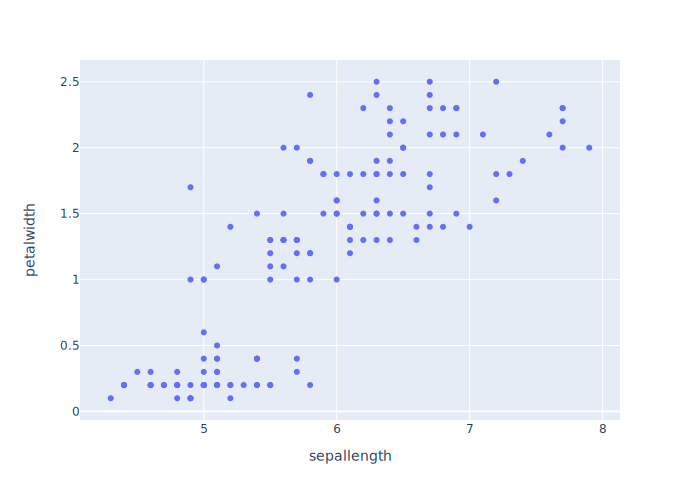

In [3]:
plot = px.scatter(iris_df, x='sepallength', y='petalwidth')
plot.show("svg")

Again, we'll use Gradient Descent for this regression.

Using the generalized model function from before:

Say for $j$ in features $1, ..., n$ (or petal length, ..., sepal length), we apply a different $\theta$ for each:

$$h_Θ(x) =  \sum_{j=1}^{n} \theta_j x_j$$

And the same Squared error loss $J(\theta)$: 

For training samples $i$ in $1, ..., m$ and their corresponding acutal outputs $y$, we apply the following function to get the total loss of our training set:
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_Θ(x^{(i)}) - y^{(i)} )^2 $$

Finally, we'll again compute the Jacobian of this function:
$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2}  (h_Θ(x) - y )^2 $$

Apply chain rule:
$$  \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{2} \times 2 \times (h_Θ(x) - y) \times \frac{\partial}{\partial \theta_j} (h_Θ(x) - y) $$

Cancel and expand $h_Θ(x)$:
$$\frac{\partial}{\partial \theta_j} J(\theta) = (h_Θ(x) - y) \times \frac{\partial}{\partial \theta_j} (\theta_0 x_0 + ... + \theta_n x_n - y) $$

Plug in $j$ and apply derivative:


$$\frac{\partial}{\partial \theta_j} J(\theta) = (h_Θ(x) - y) \times x_j $$


Finally, we can use this to update $\theta$ each iteration of the algorithm, with a learning rate $\alpha$:
$$\theta_j := \theta_j - \alpha \times (h_Θ(x) - y) \times x_0$$


At this point, we keep applying the update to $\theta_j$ until the algorithm converges. The only difference from the single linear regression is we'll have another $\theta$ parameter to fit as well. We'll have to wait until these both converge to fit our plane. 

In [10]:
α = .0001 # Learning rate
Θ = [0, 0] # Parameters
samples = iris_df[['sepallength', 'petallength', 'petalwidth']]

def h_Θ(theta, features):
    # This is our model
    total = 0
    for ind in range(len(theta)):
        total += theta[ind] * features[ind]
    return total

def J_Θ(samples): 
    # This is the loss function
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, [sample['sepallength'], sample['petallength']]) - sample['petalwidth'])**2
    return .5 * total

def dΘ_j_J_Θ(samples, j):
    # This is the derivative of our loss, for gradient descent
    total = 0
    for ind, sample in samples.iterrows():
        total += (h_Θ(Θ, [sample['sepallength'], sample['petallength']]) - sample['petalwidth']) * sample[j]
    return total

for i in range(200):
    for j, _ in enumerate(Θ):
        if i % 20 == 0: 
            print(f"Theta {j} {i}: {Θ[j]}")
            print(f"Loss {j} {i}: {J_Θ(samples)}")
        Θ[j] = Θ[j] - α * dΘ_j_J_Θ(samples, j)

Theta 0 0: 0
Loss 0 0: 151.15000000000006
Theta 1 0: 0
Loss 1 0: 57.203642981808095
Theta 0 20: 0.09134339934945904
Loss 0 20: 11.554546165384277
Theta 1 20: 0.19742516086325193
Loss 1 20: 11.451244328195953
Theta 0 40: 0.029869374670641796
Loss 0 40: 6.680872440722509
Theta 1 40: 0.28584991396056925
Loss 1 40: 6.637046386642472
Theta 0 60: -0.010171521689405364
Loss 0 60: 4.613204776757608
Theta 1 60: 0.34344507506077493
Loss 1 60: 4.594611469150781
Theta 0 80: -0.03625202288466547
Loss 0 80: 3.735991856000886
Theta 1 80: 0.3809594866865326
Loss 1 80: 3.7281036010571316
Theta 0 100: -0.053239468332431726
Loss 0 100: 3.3638321894580727
Theta 1 100: 0.4053943706723291
Loss 1 100: 3.3604855785498104
Theta 0 120: -0.06430418295123211
Loss 0 120: 3.2059425663985066
Theta 1 120: 0.4213099489667621
Loss 1 120: 3.2045227587666356
Theta 0 140: -0.0715111470572798
Loss 0 140: 3.138957518552051
Theta 1 140: 0.4316765065732345
Loss 1 140: 3.138355161789708
Theta 0 160: -0.07620537853231542
Loss 0

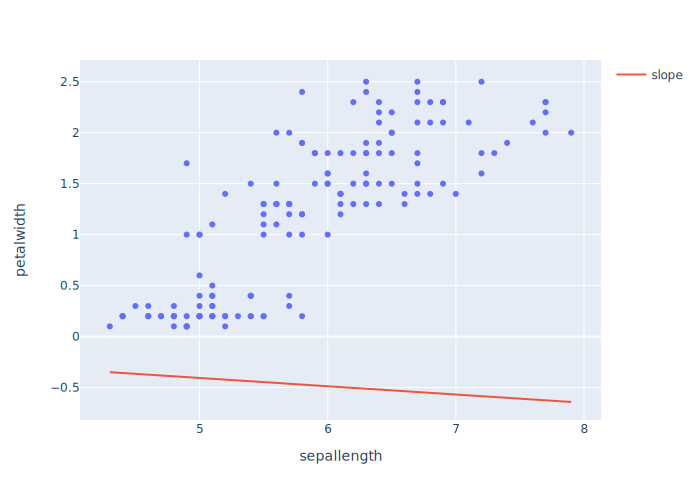

In [11]:
# Thanks to Dmitry.Balabka for the code snippet to plot a line on a scatter given a slope
# Source: https://community.plotly.com/t/plotly-python-how-to-add-a-line-with-given-slope-and-intercapt-to-a-given-x-y-plot/44970/6

import plotly.graph_objects as go

fig = px.scatter(samples, 'sepallength', 'petalwidth')
fig.add_trace(
    go.Scatter(x=samples['sepallength'], y=Θ[0]*samples['sepallength'], name="slope", line_shape='linear')
)
fig.show("svg")

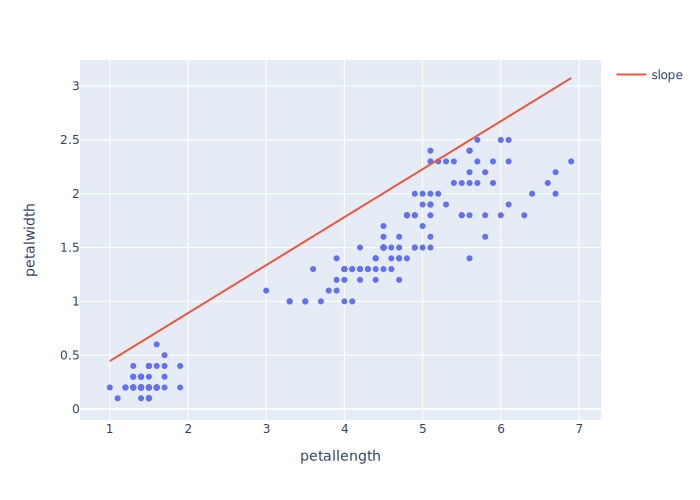

In [12]:
fig = px.scatter(samples, 'petallength', 'petalwidth')
fig.add_trace(
    go.Scatter(x=samples['petallength'], y=Θ[1]*samples['petallength'], name="slope", line_shape='linear')
)
fig.show("svg")

In [27]:

fig = px.scatter_3d(samples, x='sepallength', y='petallength', z='petalwidth')
fig.add_trace(
    go.Surface(x=Θ[0]*samples['sepallength'], y=Θ[1]*samples['petallength'], z=[5,5])
)
fig.show()

In [103]:
import numpy as np
fig = px.scatter_3d(samples, x='sepallength', y='petallength', z='petalwidth')
# fig.add_trace(
#     go.Surface(x=Θ[0]*samples['sepallength'], y=Θ[1]*samples['petallength'], z=[5,5])
# )

zero_pt = pd.Series([0])
z = zero_pt.append(samples['sepallength'], ignore_index = True).reset_index(drop = True)
y = zero_pt.append(samples['petallength'], ignore_index = True).reset_index(drop = True)
x = zero_pt.append(samples['petalwidth'], ignore_index = True).reset_index(drop = True)

length_data = len(z)
z_plane_pos = np.ones((length_data,length_data))
z_plane_pos = [z_plane_pos[0]*Θ[0]*np.mean(samples['sepallength']), z_plane_pos[1]*Θ[1]*np.mean(samples['petallength'])] 

x=samples['sepallength']
y=samples['petallength']
xi = np.linspace(x.min(), x.max())
yi = np.linspace(y.min(), y.max())


fig.add_trace(go.Surface(x=xi, y=yi, z=z_plane_pos, showscale=False, ))


C:\Users\Caleb\AppData\Local\Temp\ipykernel_15096\2413122957.py:8: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Caleb\AppData\Local\Temp\ipykernel_15096\2413122957.py:9: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Caleb\AppData\Local\Temp\ipykernel_15096\2413122957.py:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [100]:
xi

array([4.3       , 4.37346939, 4.44693878, 4.52040816, 4.59387755,
       4.66734694, 4.74081633, 4.81428571, 4.8877551 , 4.96122449,
       5.03469388, 5.10816327, 5.18163265, 5.25510204, 5.32857143,
       5.40204082, 5.4755102 , 5.54897959, 5.62244898, 5.69591837,
       5.76938776, 5.84285714, 5.91632653, 5.98979592, 6.06326531,
       6.13673469, 6.21020408, 6.28367347, 6.35714286, 6.43061224,
       6.50408163, 6.57755102, 6.65102041, 6.7244898 , 6.79795918,
       6.87142857, 6.94489796, 7.01836735, 7.09183673, 7.16530612,
       7.23877551, 7.3122449 , 7.38571429, 7.45918367, 7.53265306,
       7.60612245, 7.67959184, 7.75306122, 7.82653061, 7.9       ])

In [99]:
yi

array([1.        , 1.12040816, 1.24081633, 1.36122449, 1.48163265,
       1.60204082, 1.72244898, 1.84285714, 1.96326531, 2.08367347,
       2.20408163, 2.3244898 , 2.44489796, 2.56530612, 2.68571429,
       2.80612245, 2.92653061, 3.04693878, 3.16734694, 3.2877551 ,
       3.40816327, 3.52857143, 3.64897959, 3.76938776, 3.88979592,
       4.01020408, 4.13061224, 4.25102041, 4.37142857, 4.49183673,
       4.6122449 , 4.73265306, 4.85306122, 4.97346939, 5.09387755,
       5.21428571, 5.33469388, 5.45510204, 5.5755102 , 5.69591837,
       5.81632653, 5.93673469, 6.05714286, 6.17755102, 6.29795918,
       6.41836735, 6.53877551, 6.65918367, 6.77959184, 6.9       ])

In [87]:
z_plane_pos

[array([-0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.47479706, -0.47479706,
        -0.47479706, -0.47479706, -0.47479706, -0.4

Looks like something's gone awry with sepal length. Todo: fix this.